In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# use the inspector to inspect the table and get name of the columns and types

inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()
Measurement = Base.classes.measurement
rain_12 = session.query(Measurement.prcp, Measurement.date).\
filter(Measurement.date > '2016-08-22').all()
print(rain_12)


[(0.0, '2016-08-23'), (0.08, '2016-08-24'), (0.08, '2016-08-25'), (0.0, '2016-08-26'), (0.0, '2016-08-27'), (0.01, '2016-08-28'), (0.0, '2016-08-29'), (0.0, '2016-08-30'), (0.13, '2016-08-31'), (0.0, '2016-09-01'), (0.0, '2016-09-02'), (0.0, '2016-09-03'), (0.03, '2016-09-04'), (None, '2016-09-05'), (None, '2016-09-06'), (0.05, '2016-09-07'), (0.0, '2016-09-08'), (0.03, '2016-09-09'), (0.0, '2016-09-10'), (0.05, '2016-09-11'), (0.0, '2016-09-12'), (0.02, '2016-09-13'), (1.32, '2016-09-14'), (0.42, '2016-09-15'), (0.06, '2016-09-16'), (0.05, '2016-09-17'), (0.0, '2016-09-18'), (0.0, '2016-09-19'), (0.0, '2016-09-20'), (0.0, '2016-09-21'), (0.02, '2016-09-22'), (0.0, '2016-09-23'), (0.0, '2016-09-24'), (0.0, '2016-09-25'), (0.06, '2016-09-26'), (0.02, '2016-09-27'), (0.0, '2016-09-28'), (0.0, '2016-09-29'), (0.0, '2016-09-30'), (0.0, '2016-10-01'), (0.0, '2016-10-02'), (0.0, '2016-10-03'), (0.0, '2016-10-04'), (0.0, '2016-10-05'), (0.0, '2016-10-06'), (0.0, '2016-10-07'), (0.0, '2016-10-

In [13]:
# query for the month within the year
month_12 = session.query(Measurement.date).\
filter(Measurement.date > '2016-08-22').all()
print(month_12)

[('2016-08-23',), ('2016-08-24',), ('2016-08-25',), ('2016-08-26',), ('2016-08-27',), ('2016-08-28',), ('2016-08-29',), ('2016-08-30',), ('2016-08-31',), ('2016-09-01',), ('2016-09-02',), ('2016-09-03',), ('2016-09-04',), ('2016-09-05',), ('2016-09-06',), ('2016-09-07',), ('2016-09-08',), ('2016-09-09',), ('2016-09-10',), ('2016-09-11',), ('2016-09-12',), ('2016-09-13',), ('2016-09-14',), ('2016-09-15',), ('2016-09-16',), ('2016-09-17',), ('2016-09-18',), ('2016-09-19',), ('2016-09-20',), ('2016-09-21',), ('2016-09-22',), ('2016-09-23',), ('2016-09-24',), ('2016-09-25',), ('2016-09-26',), ('2016-09-27',), ('2016-09-28',), ('2016-09-29',), ('2016-09-30',), ('2016-10-01',), ('2016-10-02',), ('2016-10-03',), ('2016-10-04',), ('2016-10-05',), ('2016-10-06',), ('2016-10-07',), ('2016-10-08',), ('2016-10-09',), ('2016-10-10',), ('2016-10-11',), ('2016-10-12',), ('2016-10-13',), ('2016-10-14',), ('2016-10-15',), ('2016-10-16',), ('2016-10-17',), ('2016-10-18',), ('2016-10-19',), ('2016-10-20'

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column

data_df = pd.DataFrame(rain_12)
data_df.fillna(0)
data_df.head()

,prcp,date
0,0.00,2016-08-23
1,0.08,2016-08-24
2,0.08,2016-08-25
3,0.00,2016-08-26
4,0.00,2016-08-27


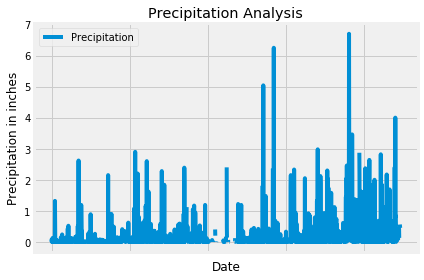

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
data_df.plot("date","prcp")
plt.xlabel("Date")
plt.ylabel("Precipitation in inches")
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"])
plt.tight_layout()
plt.show()


In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# How many stations are available in this dataset?
Station = Base.classes.station
stations = session.query(Station).count()
print(f'There are {stations} stations in the dataset')

There are 9 stations in the dataset


In [18]:
# What are the most active stations?
active_station = session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
                                        
print(f'The most active station is {active_station[0][0]}')
# List the stations and the counts in descending order.

print(active_station)

The most active station is USC00519281
[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
data_active_station = session.query(Measurement.station\
                                    ,func.min(Measurement.tobs), func.max(Measurement.tobs)\
                                              ,func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

print(data_active_station)

[('USC00519281', 54.0, 85.0, 71.66378066378067)]


In [37]:
# Choose the station with the highest number of temperature observations.

high_temp_station = session.query(Measurement.station, func.max(Measurement.tobs)).all()
print(high_temp_station)

[('USC00519397', 87.0)]


In [21]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

year_data_high_temp = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station == 'USC00519397'\
                                                                             ,Measurement.date > '2016-08-22').all()

#print(year_data_high_temp)
high_temp_station_df = pd.DataFrame(year_data_high_temp)
high_temp_station_df.head()


,date,tobs
0,2016-08-23,81.0
1,2016-08-24,79.0
2,2016-08-25,80.0
3,2016-08-26,79.0
4,2016-08-27,77.0


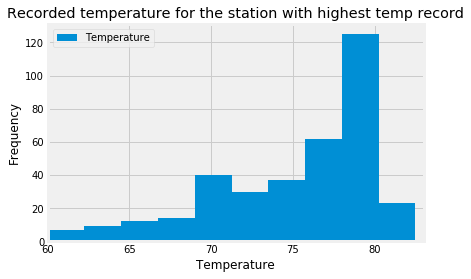

In [35]:
# plot the results in histogram
plt.hist(high_temp_station_df['tobs'],bins=12)
plt.xlabel("Temperature")
plt.xlim(60,83)
plt.ylabel("Frequency")
plt.title("Recorded temperature for the station with highest temp record")
plt.legend(["Temperature"])
plt.show()

In [23]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [26]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [28]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [29]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [30]:
# Plot the daily normals as an area plot with `stacked=False`


# Step 2: Climate App

In [31]:
# Flask Dependencies
from flask import Flask, jsonify

In [32]:
# Flask Setup
app = Flask(__name__)

In [33]:
# Flask Routes
@app.route("/api/v1.0/precipitation")
def precipitation():
    """Dates and observations of rain fall from last year."""
    results = session.query(Measurement.date,Measurement.prcp)\
    .filter(Measurement.date > '2016-08-22').all()
    data = list(np.ravel(results))
    return jsonify(data)

@app.route("/api/v1.0/stations")
def stations():
    """Return a JSON list of stations from the dataset"""
    results = session.query(Station.station, Station.name)
    data = list(np.ravel(results))
    return jsonify(data)

@app.route("/api/v1.0/tobs")
def temp():
    """Return a JSON list of Temperature observation for the previous year"""
    results = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.data > '2016-08-22').all()
    data = list(np.ravel(results))
    return jsonify(data)

if __name__ == "__main__":
    app.run(debug=True)

UnsupportedOperation: not writable